# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_ameisen.csv")

In [3]:
df.head()

,ORDER,FAMILY,Artname,N,S,CH,Bemerkungen
0,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Hypoponera eduardi (Forel),-,4,4.0,NaN
1,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Anergates atratulus (Schenk),3,3,3.0,Wiesen und Weiden
2,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Aphaenogaster gibbosa (Latreille),-,4,4.0,Strassenränder
3,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),A. italica Santschi,-,4,4.0,Strassenränder
4,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),A. subterranea (Latreille),3,n,3.0,Flaumeichenwälder


In [4]:
len (df)

65

In [5]:
df.shape

(65, 7)

In [6]:
df["CH"].value_counts()

3.0    21
2.0    17
4.0    17
1.0     5
0.0     3
Name: CH, dtype: int64

In [7]:
df.pop("N")

0       -
1       3
2       -
3       -
4       3
5       -
6       2
7       2
8       3
9       3
10      2
11      4
12      -
13      2
14      2
15      2
16      -
17      2
18      2
19      -
20      -
21      -
22      3
23      2
24      4
25      3
26      3
27      2
28      -
29      -
     ... 
35      -
36      0
37    NaN
38      0
39      3
40      0
41      -
42      2
43      0
44      2
45      3
46      1
47      -
48      -
49      -
50      4
51      3
52      3
53      4
54      3
55      2
56      2
57      0
58      2
59      3
60      2
61      4
62      4
63      -
64      2
Name: N, Length: 65, dtype: object

In [8]:
df.pop("S")

0       4
1       3
2       4
3       4
4       n
5       2
6       2
7       -
8       3
9       3
10      -
11      4
12      4
13      -
14      n
15      -
16      4
17      2
18      n
19      4
20      1
21      4
22      3
23      -
24      -
25      3
26      3
27      -
28      4
29      4
     ... 
35      4
36      4
37    NaN
38      n
39      3
40      n
41      1
42      3
43      1
44      2
45      3
46      -
47      4
48      1
49      0
50      4
51      3
52      3
53      4
54      n
55      -
56      3
57      -
58      2
59      3
60      2
61      n
62      n
63      2
64      3
Name: S, Length: 65, dtype: object

In [9]:
df.head(1)

,ORDER,FAMILY,Artname,CH,Bemerkungen
0,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Hypoponera eduardi (Forel),4.0,NaN


In [10]:
df.rename(columns={"ORDER":"order", "FAMILY":"family","Artname": "sc name", "CH":"cat ch", "Bemerkungen":"bemerkungen"},inplace=True)

In [11]:
df.head(4)

,order,family,sc name,cat ch,bemerkungen
0,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Hypoponera eduardi (Forel),4.0,NaN
1,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Anergates atratulus (Schenk),3.0,Wiesen und Weiden
2,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Aphaenogaster gibbosa (Latreille),4.0,Strassenränder
3,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),A. italica Santschi,4.0,Strassenränder


In [12]:
df['einteilung'] = 'Insekten'
df['untergruppe'] = 'Ameisen'

In [13]:
df.head(4)

,order,family,sc name,cat ch,bemerkungen,einteilung,untergruppe
0,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Hypoponera eduardi (Forel),4.0,NaN,Insekten,Ameisen
1,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Anergates atratulus (Schenk),3.0,Wiesen und Weiden,Insekten,Ameisen
2,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),Aphaenogaster gibbosa (Latreille),4.0,Strassenränder,Insekten,Ameisen
3,HYMENOPTERA (HAUTFLÜGLER),Formicidae (AMEISEN),A. italica Santschi,4.0,Strassenränder,Insekten,Ameisen


In [14]:
df["cat ch"].value_counts()

3.0    21
2.0    17
4.0    17
1.0     5
0.0     3
Name: cat ch, dtype: int64

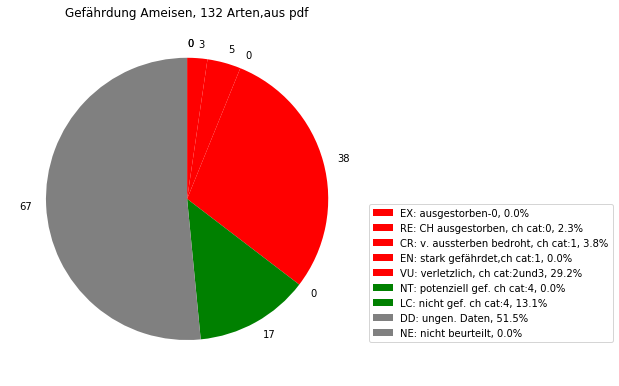

In [15]:
values = [0, 3, 5, 0, 38, 0, 17, 67, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben-0', 'RE: CH ausgestorben, ch cat:0',
    'CR: v. aussterben bedroht, ch cat:1', 'EN: stark gefährdet,ch cat:1', 
    'VU: verletzlich, ch cat:2und3',"NT: potenziell gef. ch cat:4",
    "LC: nicht gef. ch cat:4","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Ameisen, 132 Arten,aus pdf')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()